In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.master("local[2]").appName("stream code").getOrCreate()

In [4]:
def myfun(x):
    return x.upper()

In [5]:
myfun('ram')

'RAM'

In [10]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import *

In [12]:
myuprfun = udf(lambda x:myfun(x),StringType())

In [13]:
fun1 = udf(lambda x: myfun(x))

In [5]:
df = spark.read.format("json").load("C:\\Users\\Krishna\\data\\people.json")

In [15]:
df.show()


+----+-------+-----+
| age|   name|pcode|
+----+-------+-----+
|null|  Alice|94304|
|  30|Brayden|94304|
|  19|  Carla|10036|
|  46|  Diana| null|
|null|Etienne|94104|
+----+-------+-----+



In [16]:
df.withColumn("changecase",fun1("name")).show()

+----+-------+-----+----------+
| age|   name|pcode|changecase|
+----+-------+-----+----------+
|null|  Alice|94304|     ALICE|
|  30|Brayden|94304|   BRAYDEN|
|  19|  Carla|10036|     CARLA|
|  46|  Diana| null|     DIANA|
|null|Etienne|94104|   ETIENNE|
+----+-------+-----+----------+



In [17]:
df.withColumn("changecase",myuprfun("name")).show()

+----+-------+-----+----------+
| age|   name|pcode|changecase|
+----+-------+-----+----------+
|null|  Alice|94304|     ALICE|
|  30|Brayden|94304|   BRAYDEN|
|  19|  Carla|10036|     CARLA|
|  46|  Diana| null|     DIANA|
|null|Etienne|94104|   ETIENNE|
+----+-------+-----+----------+



In [28]:
strlen = spark.udf.register("stringLengthString", lambda x: len(x))

In [29]:
strlen = spark.udf.register("f1", lambda x: myfun(x))

In [30]:
df.createTempView("people")

In [31]:
spark.sql("select name,f1(name) from people").show()

+-------+--------+
|   name|f1(name)|
+-------+--------+
|  Alice|   ALICE|
|Brayden| BRAYDEN|
|  Carla|   CARLA|
|  Diana|   DIANA|
|Etienne| ETIENNE|
+-------+--------+



<AxesSubplot:>

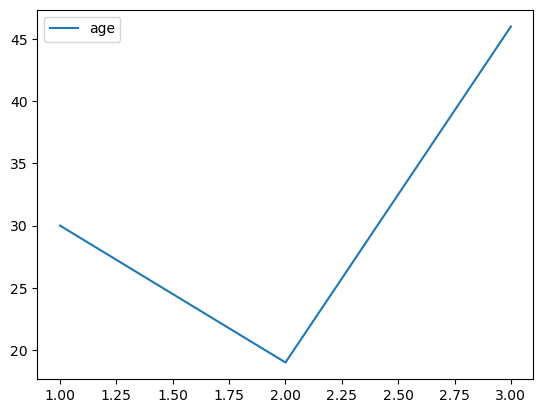

In [6]:
#UDAF
data = [(1, "A"), (2, "A"), (3, "A"),
        (4, "B"), (5, "B"), (6, "B")]
df = spark.createDataFrame(data, ["value", "category"])

df.show()